In [2]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
digits = load_digits()
%matplotlib inline
plt.gray()

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
def plot_images(digits):
    fig, ax= plt.subplots(10,10, figsize=(15,15))
    axes = ax.flatten()
    for i, ax in enumerate(axes):
            ax.imshow(digits.images[i])
            ax.set_xticks([])
            ax.set_yticks([])
            ax.axis('off')
    





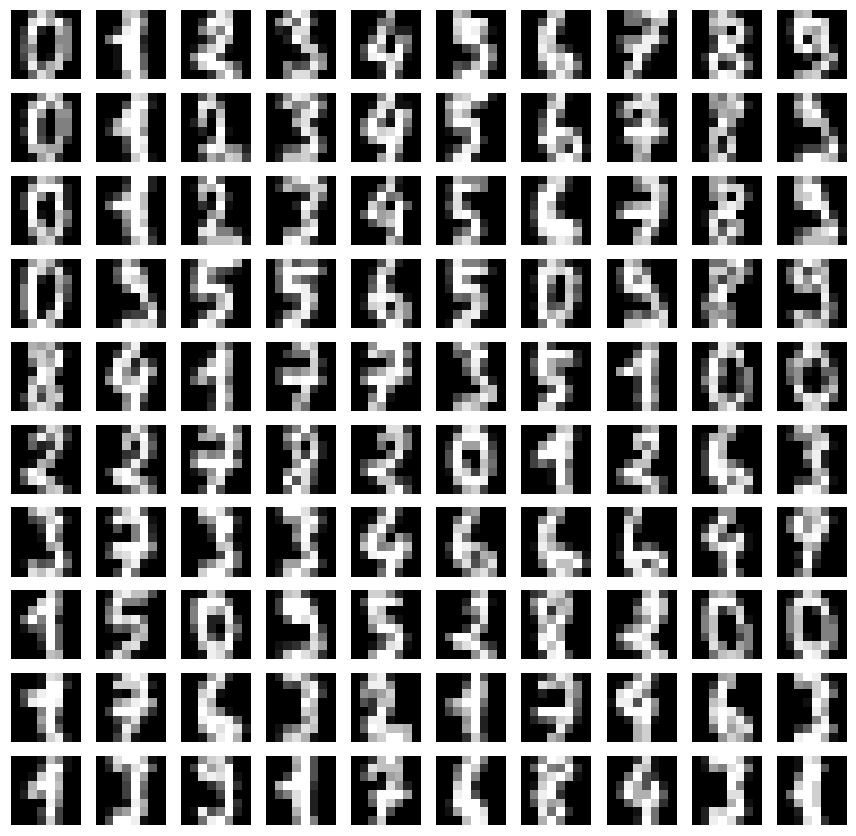

In [4]:
plot_images(digits)

In [5]:
#load first 6 digit
six_digits= load_digits(n_class=6)
#Scale Data
scaler = StandardScaler()
scaler.fit(six_digits.data)
scaled_data = scaler.transform(six_digits.data)


In [6]:
# def fit_component_anaylsis(data, n_comp = 10):
#     pca = PCA(n_components = n_comp)
#     pca.fit(data)
#     return pca.transform(data)

pca = PCA(n_components = 5)
pca.fit(scaled_data)
X_pca = pca.transform(scaled_data)


In [7]:
def scree_plot(pca, title=None):
    num_components = pca.n_components_
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    plt.figure(figsize=(10, 6), dpi=250)
    ax = plt.subplot(111)
    ax.bar(ind, vals, 0.35,
           color=[(0.949, 0.718, 0.004),
                  (0.898, 0.49, 0.016),
                  (0.863, 0, 0.188),
                  (0.694, 0, 0.345),
                  (0.486, 0.216, 0.541),
                  (0.204, 0.396, 0.667),
                  (0.035, 0.635, 0.459),
                  (0.486, 0.722, 0.329),
                 ])

    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)

    ax.set_xticklabels(ind,
                       fontsize=12)

    ax.set_ylim(0, max(vals)+0.05)
    ax.set_xlim(0-0.45, 8+0.45)

    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)

    ax.set_xlabel("Principal Component", fontsize=12)
    ax.set_ylabel("Variance Explained (%)", fontsize=12)

    if title is not None:
        plt.title(title, fontsize=16)

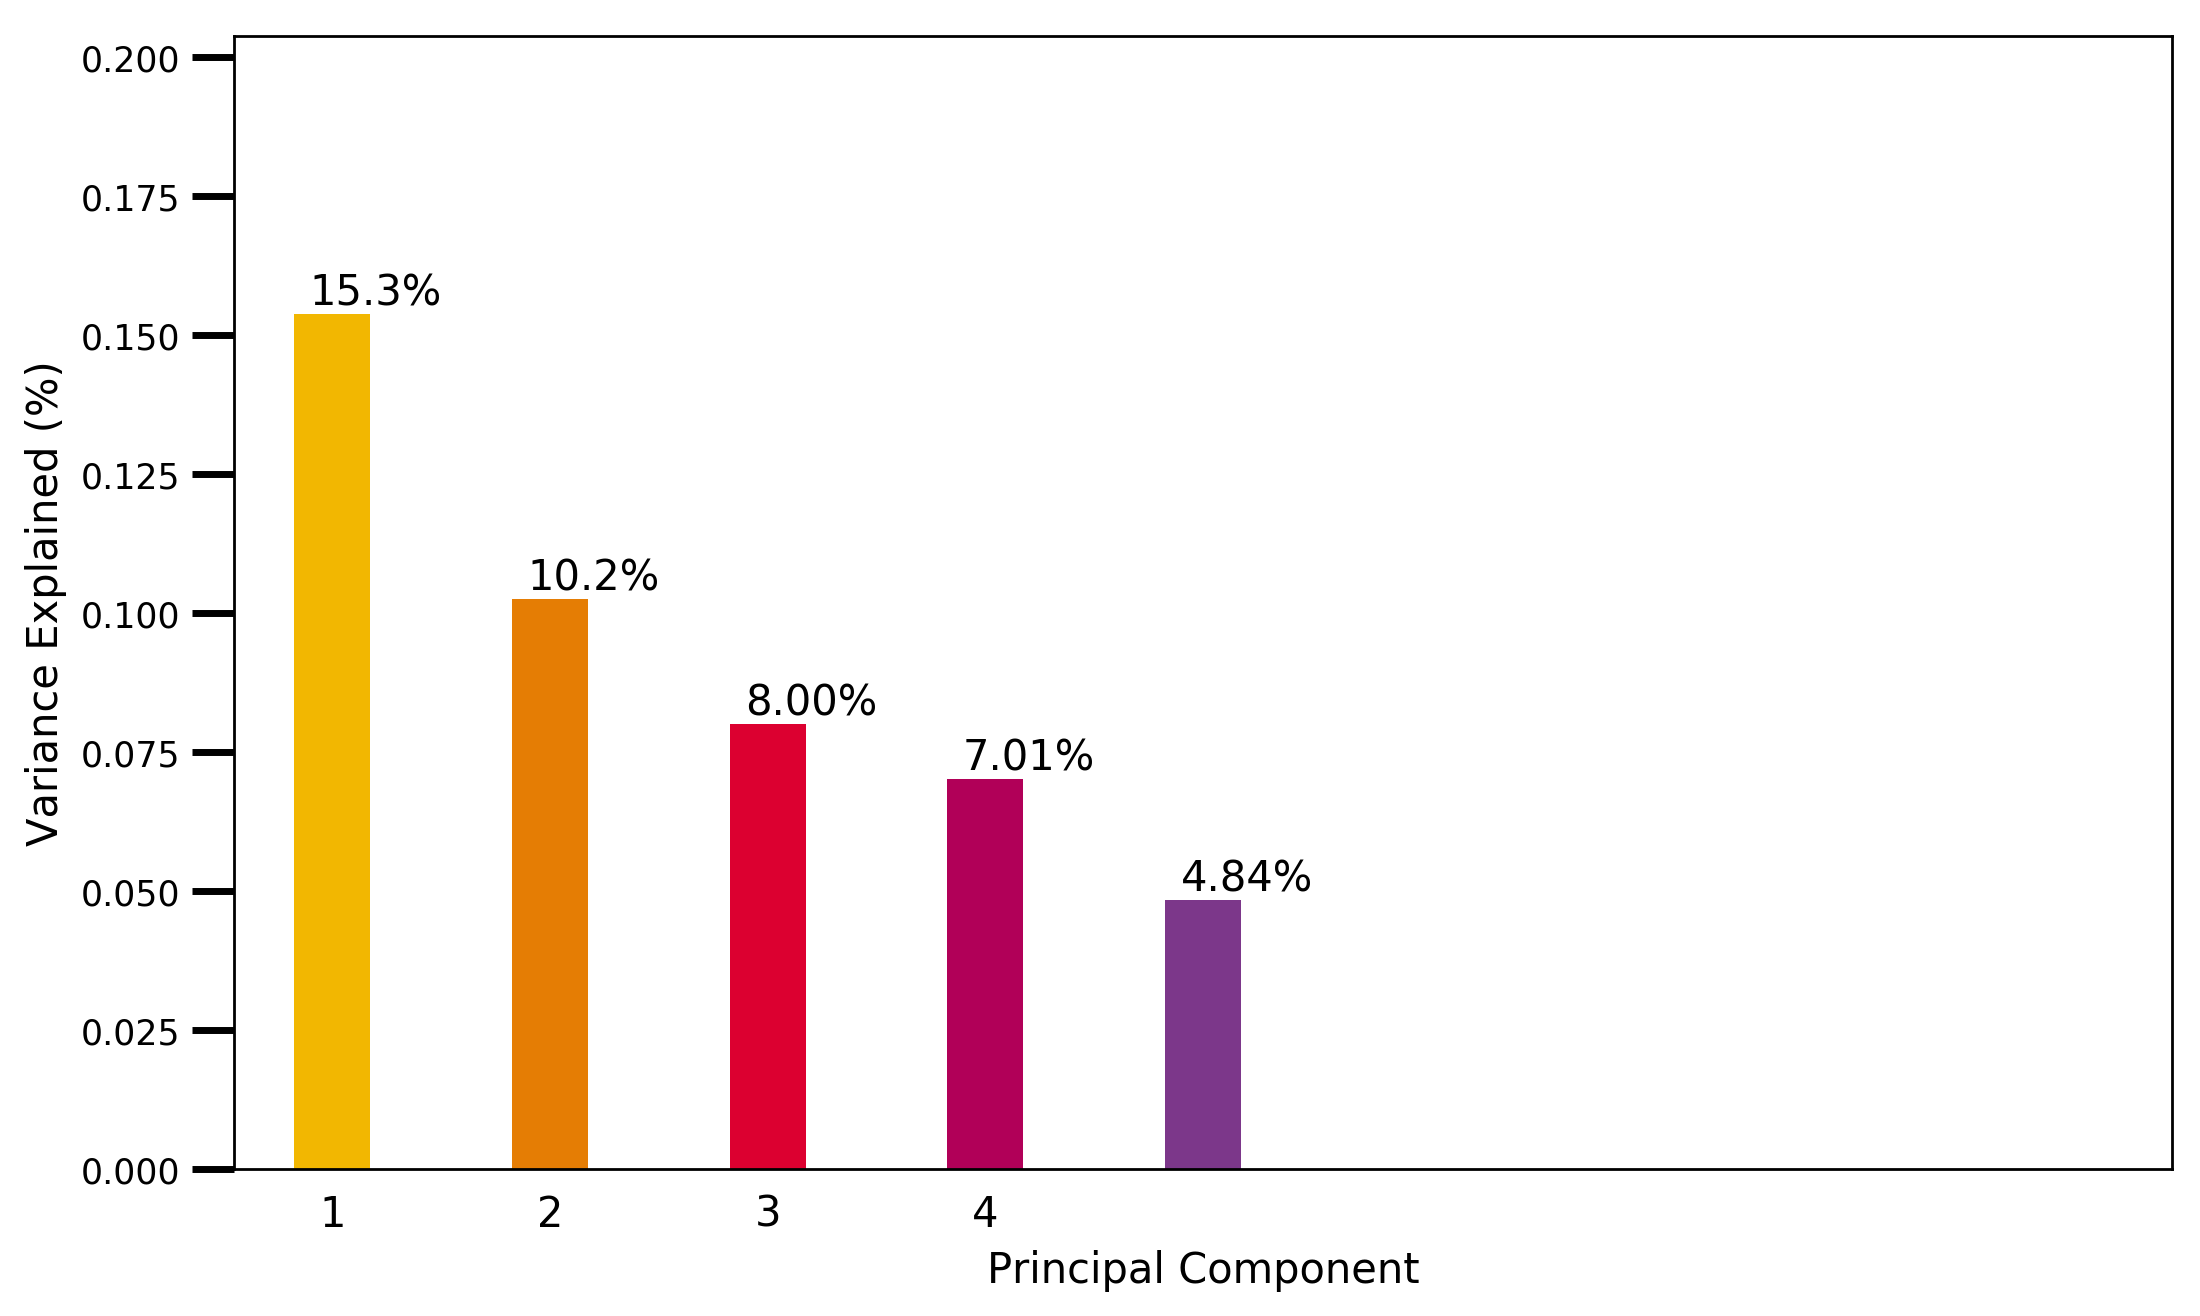

In [8]:
scree_plot(pca)

In [9]:
def plot_embedding(X, y, title=None):
    '''
    INPUT:
    X - decomposed feature matrix
    y - target labels (digits)

    Creates a pyplot object showing digits projected onto 2-dimensional
    feature space. PCA should be performed on the feature matrix before 
    passing it to plot_embedding.

    '''
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(10, 6), dpi=250)
    ax = plt.subplot(111)
    ax.axis('off')
    ax.patch.set_visible(False)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 12})

    plt.xticks([]), plt.yticks([])
    plt.ylim([-0.1,1.1])
    plt.xlim([-0.1,1.1])

    if title is not None:
        plt.title(title, fontsize=16)

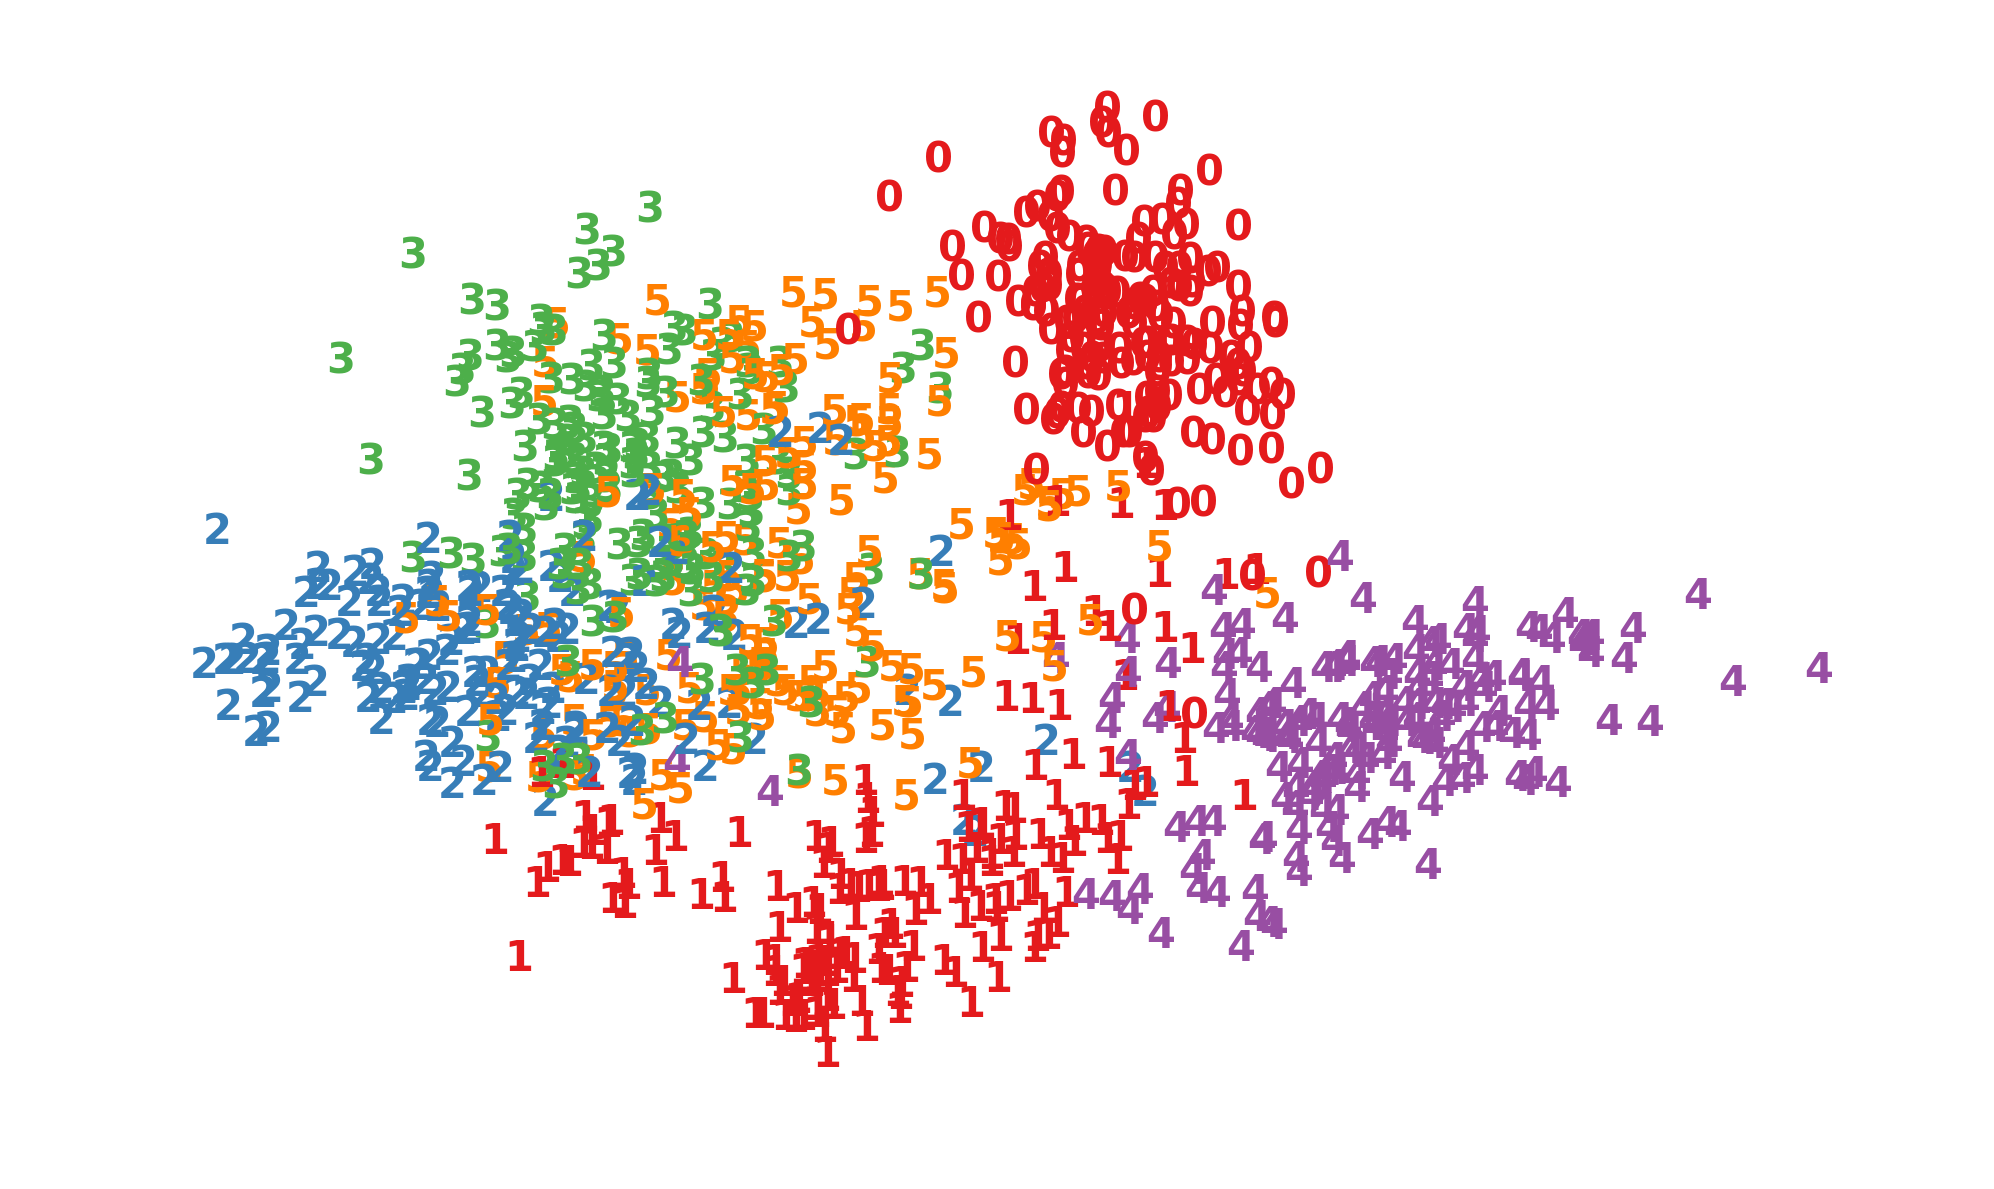

In [10]:
y = six_digits.target
plot_embedding(X_pca,y)

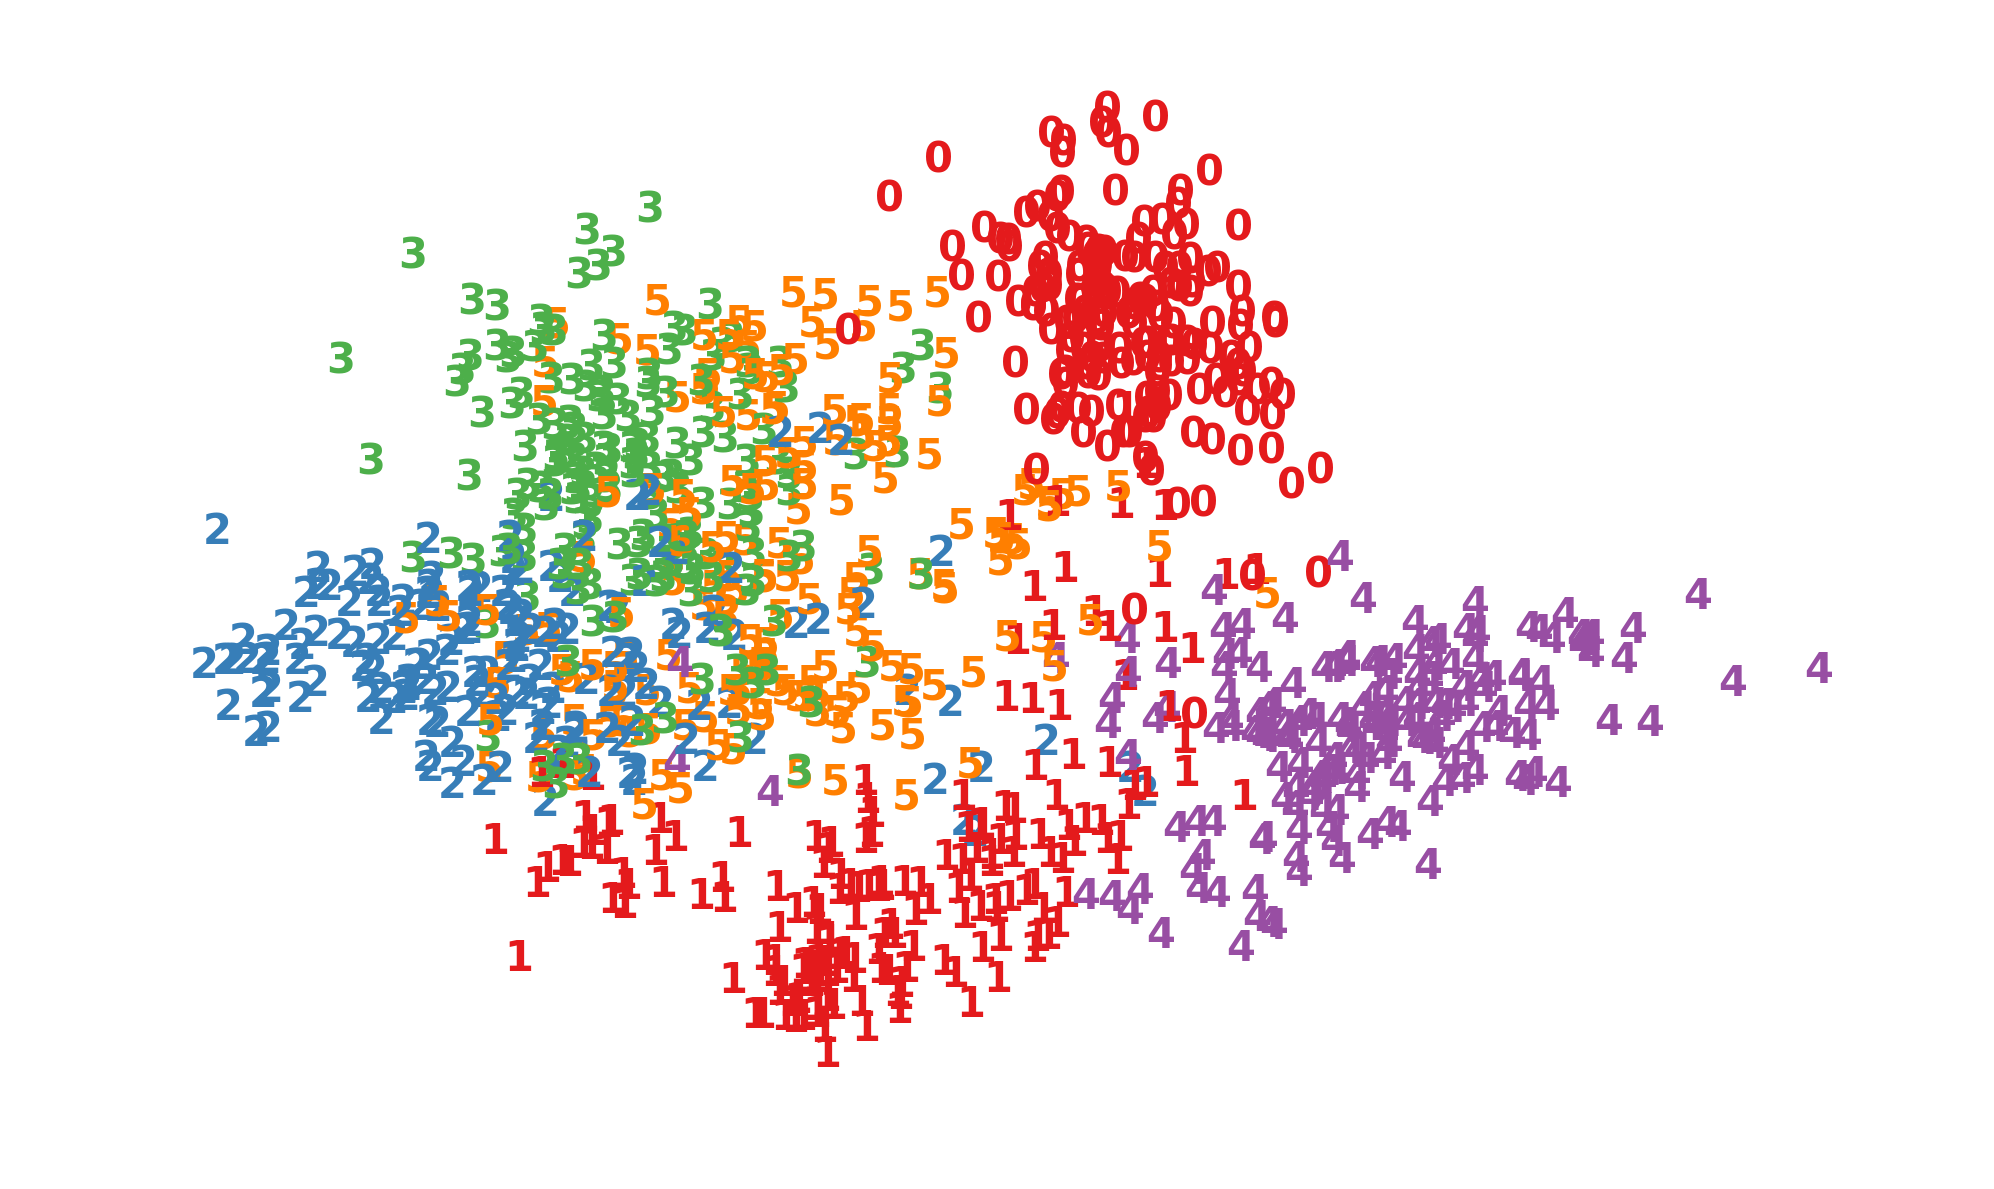

In [11]:
plot_embedding(X_pca,y)

In [12]:
#import new car data
cars = pd.read_table('data/cars.tsv', header=None)
cars.head()

,0,1
0,18.0 8 307.0 130.0 3504. 12...,chevrolet chevelle malibu
1,15.0 8 350.0 165.0 3693. 11...,buick skylark 320
2,18.0 8 318.0 150.0 3436. 11...,plymouth satellite
3,16.0 8 304.0 150.0 3433. 12...,amc rebel sst
4,17.0 8 302.0 140.0 3449. 10...,ford torino


In [13]:
new_df = pd.concat([pd.DataFrame(cars.iloc[:,0].str.split().tolist()),
                    pd.DataFrame(cars.iloc[:,1])], axis=1, ignore_index=True)

In [14]:
new_df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.,10.5,70,1,ford torino


In [15]:
#clean the data.
car_df = new_df[new_df[3] != '?'].iloc[:,:8]

In [16]:
car_df.head()

,0,1,2,3,4,5,6,7
0,18.0,8,307.0,130.0,3504.,12.0,70,1
1,15.0,8,350.0,165.0,3693.,11.5,70,1
2,18.0,8,318.0,150.0,3436.,11.0,70,1
3,16.0,8,304.0,150.0,3433.,12.0,70,1
4,17.0,8,302.0,140.0,3449.,10.5,70,1


In [17]:
car_df.columns = ['mpg', 'cylinders','displacement','horsepower','weight','acceleration','model_year', 'origin']

In [18]:
car_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.,12.0,70,1
1,15.0,8,350.0,165.0,3693.,11.5,70,1
2,18.0,8,318.0,150.0,3436.,11.0,70,1
3,16.0,8,304.0,150.0,3433.,12.0,70,1
4,17.0,8,302.0,140.0,3449.,10.5,70,1


In [19]:
#convert numerical values to numeric datatypes
float_df = car_df.convert_objects(convert_numeric=True)
float_df.head()
float_df= float_df.drop('origin', axis=1)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [20]:
mpg = float_df.pop('mpg').values


In [21]:
#scale car data
car_scale = StandardScaler()
car_scale.fit(float_df)
X_scale = car_scale.transform(float_df)
#PCA for car data
car_pca = PCA(n_components=4)
car_pca.fit(X_scale)
X_transform=car_pca.transform(X_scale)



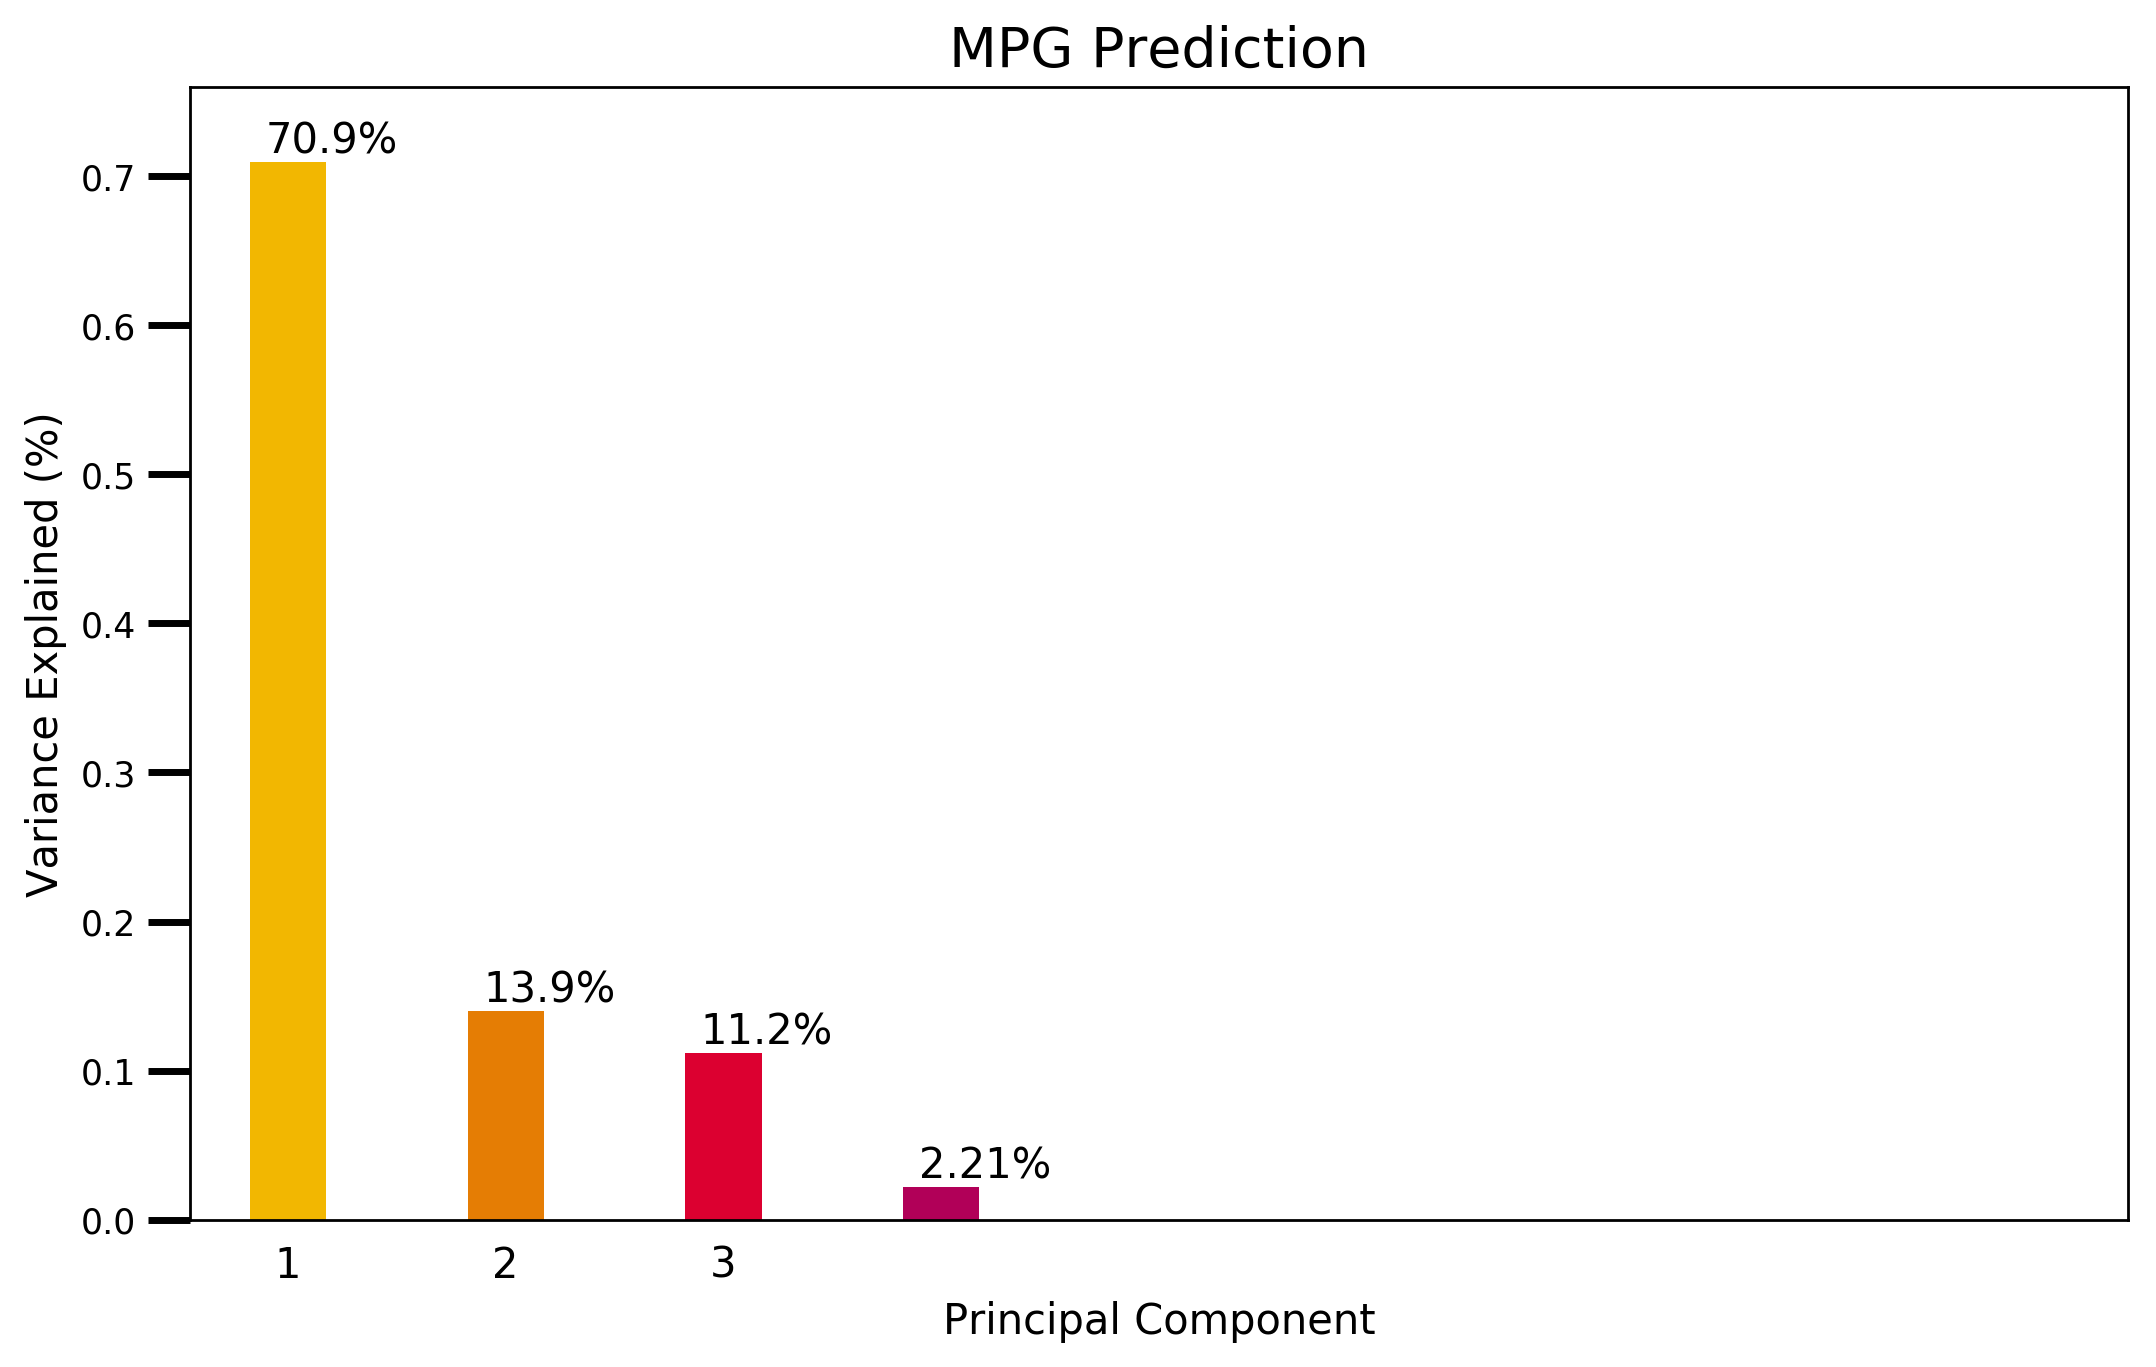

In [22]:
scree_plot(car_pca, title='MPG Prediction')

In [23]:
#Linear Regression!!!!!
model = sm.OLS(mpg, sm.add_constant(float_df))
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     272.2
Date:                Fri, 20 Oct 2017   Prob (F-statistic):          3.79e-135
Time:                        13:54:06   Log-Likelihood:                -1036.5
No. Observations:                 392   AIC:                             2087.
Df Residuals:                     385   BIC:                             2115.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -14.5353      4.764     -3.051   

In [24]:
model1 = sm.OLS(mpg, sm.add_constant(X_transform))
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     362.2
Date:                Fri, 20 Oct 2017   Prob (F-statistic):          2.25e-129
Time:                        13:54:07   Log-Likelihood:                -1056.0
No. Observations:                 392   AIC:                             2122.
Df Residuals:                     387   BIC:                             2142.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.4459      0.182    128.877      0.0

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
df_higgs = pd.read_csv('data/training.csv')


In [27]:
df_higgs.columns

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')

In [28]:
df_higgs.head()


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [29]:
df_higgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
EventId                        250000 non-null int64
DER_mass_MMC                   250000 non-null float64
DER_mass_transverse_met_lep    250000 non-null float64
DER_mass_vis                   250000 non-null float64
DER_pt_h                       250000 non-null float64
DER_deltaeta_jet_jet           250000 non-null float64
DER_mass_jet_jet               250000 non-null float64
DER_prodeta_jet_jet            250000 non-null float64
DER_deltar_tau_lep             250000 non-null float64
DER_pt_tot                     250000 non-null float64
DER_sum_pt                     250000 non-null float64
DER_pt_ratio_lep_tau           250000 non-null float64
DER_met_phi_centrality         250000 non-null float64
DER_lep_eta_centrality         250000 non-null float64
PRI_tau_pt                     250000 non-null float64
PRI_tau_eta                    250000 non-null float64
PRI_tau_phi

In [30]:
result = df_higgs.isin([-999.00]).sum()

In [31]:
col = []
for column in df_higgs.columns:
    if result[column] == 0:
        col.append(column)
print(col)

['EventId', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'Weight', 'Label']


In [32]:
df_higgs=df_higgs[col]
df_higgs.head()

,EventId,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,...,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt,Weight,Label
0,100000,51.655,97.827,27.980,3.064,41.928,197.760,1.582,1.396,32.638,...,51.626,2.273,-2.414,16.824,-0.277,258.733,2,113.497,0.002653,s
1,100001,68.768,103.235,48.146,3.473,2.078,125.157,0.879,1.414,42.014,...,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,2.233584,b
2,100002,162.172,125.953,35.635,3.148,9.336,197.814,3.776,1.414,32.154,...,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.347389,b
3,100003,81.417,80.943,0.414,3.310,0.414,75.968,2.354,-1.285,22.647,...,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-0.000,5.446378,b
4,100004,16.915,134.805,16.405,3.891,16.405,57.983,1.056,-1.385,28.209,...,29.774,0.798,1.569,2.723,-0.871,53.131,0,0.000,6.245333,b


In [33]:
y = df_higgs.pop('Label').values

In [34]:
df_higgs = df_higgs[['DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h',
       'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'PRI_tau_pt',
       'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num',
       'PRI_jet_all_pt']]


In [35]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(df_higgs, y, test_size = .15)

In [36]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth = 3, n_jobs=3, n_estimators=20)
clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=3, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [37]:
y_pred=clf.predict(X_test)
clf.score(X_test,y_test)

0.75882666666666665

In [38]:
df_test = pd.read_csv('data/test.csv')

In [39]:
df_test.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


In [40]:
result2 = df_test.isin([-999.00]).sum()
cols = []
for column2 in df_test.columns:
    if result2[column2] == 0:
        cols.append(column2)
print(cols)

['EventId', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt']


In [41]:
df_test = df_test[cols]

In [42]:
df_test.drop('EventId', inplace=True, axis=1)

In [43]:
#predict results
clf.predict(df_test)

array(['b', 'b', 'b', ..., 'b', 'b', 'b'], dtype=object)

In [44]:
df_test.head()


,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt
0,79.589,23.916,3.036,0.903,3.036,56.018,1.536,-1.404,22.088,-0.540,-0.609,33.930,-0.504,-1.511,48.509,2.022,98.556,0,-0.000
1,67.490,87.949,49.994,2.048,2.679,132.865,1.777,-1.204,30.716,-1.784,3.054,54.574,-0.169,1.795,21.093,-1.138,176.251,1,47.575
2,56.226,96.358,4.137,2.755,4.137,97.600,1.096,-1.408,46.564,-0.298,3.079,51.036,-0.548,0.336,19.461,-1.868,111.505,0,0.000
3,30.604,97.288,9.104,2.811,9.104,94.112,0.819,-1.382,51.741,0.388,-1.408,42.371,-0.295,2.148,25.131,1.172,164.707,0,0.000
4,82.772,58.731,89.646,1.028,77.213,721.552,1.713,-0.913,45.087,-1.548,1.877,77.252,-1.913,2.838,22.200,-0.231,869.614,3,599.213


In [45]:
#Grid search
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

scale = StandardScaler()
scale.fit(X_train)
scale.transform(X_train)


pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('rf', RandomForestClassifier())
    
])

param_grid = [{'reduce_dim__n_components': [2,4,8]},
             {'rf__n_estimators' :[3,10,20,30], 'rf__max_depth':[2,3]}]

rf = RandomForestClassifier(n_estimators= 5, max_depth=2,n_jobs=-1)
clf = GridSearchCV(pipe, cv=3, verbose=2, n_jobs=2, param_grid=param_grid, scoring = ['accuracy, precision'] )

In [46]:
clf.fit(X_train, y_train)

Fitting 3 folds for each of 11 candidates, totalling 33 fits
[CV] reduce_dim__n_components=2 ......................................
[CV] reduce_dim__n_components=2 ......................................
[CV] reduce_dim__n_components=2 ......................................
[CV] reduce_dim__n_components=4 ......................................


JoblibTypeError: JoblibTypeError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/anaconda/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/anaconda/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x10b16fdb0, file "/ana...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/anaconda/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/anaconda/lib/python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x10b16fdb0, file "/ana...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/anaconda/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/anaconda/lib/python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()
     17 
     18 
     19 
     20 

...........................................................................
/anaconda/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/anaconda/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/anaconda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/anaconda/lib/python3.6/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/anaconda/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/anaconda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/anaconda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/anaconda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/anaconda/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/anaconda/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/anaconda/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'clf.fit(X_train, y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 10, 20, 19, 54, 35, 687206, tzinfo=datetime.timezone.utc), 'msg_id': 'DD8B0B6120FD41A78CBB7746B4050F10', 'msg_type': 'execute_request', 'session': '1979D67D7DE34649973315753DABA7C2', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'DD8B0B6120FD41A78CBB7746B4050F10', 'msg_type': 'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'1979D67D7DE34649973315753DABA7C2']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'clf.fit(X_train, y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 10, 20, 19, 54, 35, 687206, tzinfo=datetime.timezone.utc), 'msg_id': 'DD8B0B6120FD41A78CBB7746B4050F10', 'msg_type': 'execute_request', 'session': '1979D67D7DE34649973315753DABA7C2', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'DD8B0B6120FD41A78CBB7746B4050F10', 'msg_type': 'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
/anaconda/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'1979D67D7DE34649973315753DABA7C2'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'clf.fit(X_train, y_train)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 10, 20, 19, 54, 35, 687206, tzinfo=datetime.timezone.utc), 'msg_id': 'DD8B0B6120FD41A78CBB7746B4050F10', 'msg_type': 'execute_request', 'session': '1979D67D7DE34649973315753DABA7C2', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'DD8B0B6120FD41A78CBB7746B4050F10', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/anaconda/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='clf.fit(X_train, y_train)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'clf.fit(X_train, y_train)'
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
/anaconda/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('clf.fit(X_train, y_train)',), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('clf.fit(X_train, y_train)',)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='clf.fit(X_train, y_train)', store_history=True, silent=False, shell_futures=True)
   2712                 self.displayhook.exec_result = result
   2713 
   2714                 # Execute the user code
   2715                 interactivity = "none" if silent else self.ast_node_interactivity
   2716                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2717                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2718                 
   2719                 self.last_execution_succeeded = not has_raised
   2720 
   2721                 # Reset this so later displayed values do not modify the

...........................................................................
/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>], cell_name='<ipython-input-46-48a2aac41443>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 12146a358, execution_..._before_exec=None error_in_exec=None result=None>)
   2822                     return True
   2823 
   2824             for i, node in enumerate(to_run_interactive):
   2825                 mod = ast.Interactive([node])
   2826                 code = compiler(mod, cell_name, "single")
-> 2827                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x1214ca030, file "<ipython-input-46-48a2aac41443>", line 1>
        result = <ExecutionResult object at 12146a358, execution_..._before_exec=None error_in_exec=None result=None>
   2828                     return True
   2829 
   2830             # Flush softspace
   2831             if softspace(sys.stdout, 0):

...........................................................................
/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x1214ca030, file "<ipython-input-46-48a2aac41443>", line 1>, result=<ExecutionResult object at 12146a358, execution_..._before_exec=None error_in_exec=None result=None>)
   2876         outflag = 1  # happens in more places, so it's easier as default
   2877         try:
   2878             try:
   2879                 self.hooks.pre_run_code_hook()
   2880                 #rprint('Running code', repr(code_obj)) # dbg
-> 2881                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x1214ca030, file "<ipython-input-46-48a2aac41443>", line 1>
        self.user_global_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "#Grid search\nfrom sklearn.model_selection import...d=param_grid, scoring = ['accuracy, precision'] )", "from sklearn.datasets import load_digits\nfrom sk...t_ipython().magic('matplotlib inline')\nplt.gray()", "def plot_images(digits):\n    fig, ax= plt.subplo...ax.set_yticks([])\n            ax.axis('off')\n    ", 'plot_images(digits)', '#load first 6 digit\nsix_digits= load_digits(n_cl...)\nscaled_data = scaler.transform(six_digits.data)', '# def fit_component_anaylsis(data, n_comp = 10):...t(scaled_data)\nX_pca = pca.transform(scaled_data)', 'def scree_plot(pca, title=None):\n    num_compone...s not None:\n        plt.title(title, fontsize=16)', 'scree_plot(pca)', "def plot_embedding(X, y, title=None):\n    '''\n  ...s not None:\n        plt.title(title, fontsize=16)", 'y = six_digits.target\nplot_embedding(X_pca,y)', 'plot_embedding(X_pca,y)', "#import new car data\ncars = pd.read_table('data/cars.tsv', header=None)\ncars.head()", 'new_df = pd.concat([pd.DataFrame(cars.iloc[:,0]....rame(cars.iloc[:,1])], axis=1, ignore_index=True)', 'new_df.head()', "#clean the data.\ncar_df = new_df[new_df[3] != '?'].iloc[:,:8]", 'car_df.head()', "car_df.columns = ['mpg', 'cylinders','displaceme...','weight','acceleration','model_year', 'origin']", 'car_df.head()', "#convert numerical values to numeric datatypes\nf....head()\nfloat_df= float_df.drop('origin', axis=1)", ...], 'Out': {12:                                                 ...   amc rebel sst  
4                ford torino  , 14:       0  1      2      3      4     5   6  7    ....0  3449.  10.5  70  1                ford torino, 16:       0  1      2      3      4     5   6  7
0  ...0  1
4  17.0  8  302.0  140.0  3449.  10.5  70  1, 18:     mpg cylinders displacement horsepower weight...  1  
1      1  
2      1  
3      1  
4      1  , 27: Index(['EventId', 'DER_mass_MMC', 'DER_mass_tran...
       'Weight', 'Label'],
      dtype='object'), 28:    EventId  DER_mass_MMC  DER_mass_transverse_me... b  
3      b  
4      b  

[5 rows x 33 columns], 32:    EventId  DER_mass_transverse_met_lep  DER_mas...  0.000  6.245333      b  

[5 rows x 22 columns], 36: RandomForestClassifier(bootstrap=True, class_wei...te=None,
            verbose=0, warm_start=False), 37: 0.75882666666666665, 39:    EventId  DER_mass_MMC  DER_mass_transverse_me....000  
4         599.213  

[5 rows x 31 columns], ...}, 'PCA': <class 'sklearn.decomposition.pca.PCA'>, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'StandardScaler': <class 'sklearn.preprocessing.data.StandardScaler'>, 'X_pca': array([[ 2.69540559,  4.13550916,  1.06980908, -...5698875,  1.33954926, -1.1590662 , -0.52426156]]), 'X_scale': array([[ 1.48394702,  1.07728956,  0.66413273,  ... -0.30364091,  1.40043312,
         1.63640964]]), 'X_test':         DER_mass_transverse_met_lep  DER_mass_vi...   0          -0.000  

[37500 rows x 19 columns], ...}
        self.user_ns = {'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', "#Grid search\nfrom sklearn.model_selection import...d=param_grid, scoring = ['accuracy, precision'] )", "from sklearn.datasets import load_digits\nfrom sk...t_ipython().magic('matplotlib inline')\nplt.gray()", "def plot_images(digits):\n    fig, ax= plt.subplo...ax.set_yticks([])\n            ax.axis('off')\n    ", 'plot_images(digits)', '#load first 6 digit\nsix_digits= load_digits(n_cl...)\nscaled_data = scaler.transform(six_digits.data)', '# def fit_component_anaylsis(data, n_comp = 10):...t(scaled_data)\nX_pca = pca.transform(scaled_data)', 'def scree_plot(pca, title=None):\n    num_compone...s not None:\n        plt.title(title, fontsize=16)', 'scree_plot(pca)', "def plot_embedding(X, y, title=None):\n    '''\n  ...s not None:\n        plt.title(title, fontsize=16)", 'y = six_digits.target\nplot_embedding(X_pca,y)', 'plot_embedding(X_pca,y)', "#import new car data\ncars = pd.read_table('data/cars.tsv', header=None)\ncars.head()", 'new_df = pd.concat([pd.DataFrame(cars.iloc[:,0]....rame(cars.iloc[:,1])], axis=1, ignore_index=True)', 'new_df.head()', "#clean the data.\ncar_df = new_df[new_df[3] != '?'].iloc[:,:8]", 'car_df.head()', "car_df.columns = ['mpg', 'cylinders','displaceme...','weight','acceleration','model_year', 'origin']", 'car_df.head()', "#convert numerical values to numeric datatypes\nf....head()\nfloat_df= float_df.drop('origin', axis=1)", ...], 'Out': {12:                                                 ...   amc rebel sst  
4                ford torino  , 14:       0  1      2      3      4     5   6  7    ....0  3449.  10.5  70  1                ford torino, 16:       0  1      2      3      4     5   6  7
0  ...0  1
4  17.0  8  302.0  140.0  3449.  10.5  70  1, 18:     mpg cylinders displacement horsepower weight...  1  
1      1  
2      1  
3      1  
4      1  , 27: Index(['EventId', 'DER_mass_MMC', 'DER_mass_tran...
       'Weight', 'Label'],
      dtype='object'), 28:    EventId  DER_mass_MMC  DER_mass_transverse_me... b  
3      b  
4      b  

[5 rows x 33 columns], 32:    EventId  DER_mass_transverse_met_lep  DER_mas...  0.000  6.245333      b  

[5 rows x 22 columns], 36: RandomForestClassifier(bootstrap=True, class_wei...te=None,
            verbose=0, warm_start=False), 37: 0.75882666666666665, 39:    EventId  DER_mass_MMC  DER_mass_transverse_me....000  
4         599.213  

[5 rows x 31 columns], ...}, 'PCA': <class 'sklearn.decomposition.pca.PCA'>, 'Pipeline': <class 'sklearn.pipeline.Pipeline'>, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'StandardScaler': <class 'sklearn.preprocessing.data.StandardScaler'>, 'X_pca': array([[ 2.69540559,  4.13550916,  1.06980908, -...5698875,  1.33954926, -1.1590662 , -0.52426156]]), 'X_scale': array([[ 1.48394702,  1.07728956,  0.66413273,  ... -0.30364091,  1.40043312,
         1.63640964]]), 'X_test':         DER_mass_transverse_met_lep  DER_mass_vi...   0          -0.000  

[37500 rows x 19 columns], ...}
   2882             finally:
   2883                 # Reset our crash handler in place
   2884                 sys.excepthook = old_excepthook
   2885         except SystemExit as e:

...........................................................................
/Users/jacobshomer/Desktop/Galvanize/dsi-dimensionality-reduction/<ipython-input-46-48a2aac41443> in <module>()
----> 1 
      2 
      3 
      4 
      5 
      6 clf.fit(X_train, y_train)
      7 
      8 
      9 
     10 

...........................................................................
/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py in fit(self=GridSearchCV(cv=3, error_score='raise',
       e...      scoring=['accuracy, precision'], verbose=2), X=        DER_mass_transverse_met_lep  DER_mass_vi...  1          45.307  

[212500 rows x 19 columns], y=array(['s', 'b', 'b', ..., 's', 'b', 'b'], dtype=object), groups=None)
    940 
    941         groups : array-like, with shape (n_samples,), optional
    942             Group labels for the samples used while splitting the dataset into
    943             train/test set.
    944         """
--> 945         return self._fit(X, y, groups, ParameterGrid(self.param_grid))
        self._fit = <bound method BaseSearchCV._fit of GridSearchCV(...     scoring=['accuracy, precision'], verbose=2)>
        X =         DER_mass_transverse_met_lep  DER_mass_vi...  1          45.307  

[212500 rows x 19 columns]
        y = array(['s', 'b', 'b', ..., 's', 'b', 'b'], dtype=object)
        groups = None
        self.param_grid = [{'reduce_dim__n_components': [2, 4, 8]}, {'rf__max_depth': [2, 3], 'rf__n_estimators': [3, 10, 20, 30]}]
    946 
    947 
    948 class RandomizedSearchCV(BaseSearchCV):
    949     """Randomized search on hyper parameters.

...........................................................................
/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py in _fit(self=GridSearchCV(cv=3, error_score='raise',
       e...      scoring=['accuracy, precision'], verbose=2), X=        DER_mass_transverse_met_lep  DER_mass_vi...  1          45.307  

[212500 rows x 19 columns], y=array(['s', 'b', 'b', ..., 's', 'b', 'b'], dtype=object), groups=None, parameter_iterable=<sklearn.model_selection._search.ParameterGrid object>)
    559                                   fit_params=self.fit_params,
    560                                   return_train_score=self.return_train_score,
    561                                   return_n_test_samples=True,
    562                                   return_times=True, return_parameters=True,
    563                                   error_score=self.error_score)
--> 564           for parameters in parameter_iterable
        parameters = undefined
        parameter_iterable = <sklearn.model_selection._search.ParameterGrid object>
    565           for train, test in cv_iter)
    566 
    567         # if one choose to see train score, "out" will contain train score info
    568         if self.return_train_score:

...........................................................................
/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=2), iterable=<generator object BaseSearchCV._fit.<locals>.<genexpr>>)
    763             if pre_dispatch == "all" or n_jobs == 1:
    764                 # The iterable was consumed all at once by the above for loop.
    765                 # No need to wait for async callbacks to trigger to
    766                 # consumption.
    767                 self._iterating = False
--> 768             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=2)>
    769             # Make sure that we get a last message telling us we are done
    770             elapsed_time = time.time() - self._start_time
    771             self._print('Done %3i out of %3i | elapsed: %s finished',
    772                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
TypeError                                          Fri Oct 20 13:54:41 2017
PID: 1521                                Python 3.6.1: /anaconda/bin/python
...........................................................................
/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (Pipeline(steps=[('reduce_dim', PCA(copy=True, it...None,
            verbose=0, warm_start=False))]),         DER_mass_transverse_met_lep  DER_mass_vi...  1          45.307  

[212500 rows x 19 columns], array(['s', 'b', 'b', ..., 's', 'b', 'b'], dtype=object), ['accuracy, precision'], memmap([ 70697,  70699,  70701, ..., 212497, 212498, 212499]), array([    0,     1,     2, ..., 71071, 71072, 71080]), 2, {'reduce_dim__n_components': 2}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': True, 'return_times': True, 'return_train_score': True})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (Pipeline(steps=[('reduce_dim', PCA(copy=True, it...None,
            verbose=0, warm_start=False))]),         DER_mass_transverse_met_lep  DER_mass_vi...  1          45.307  

[212500 rows x 19 columns], array(['s', 'b', 'b', ..., 's', 'b', 'b'], dtype=object), ['accuracy, precision'], memmap([ 70697,  70699,  70701, ..., 212497, 212498, 212499]), array([    0,     1,     2, ..., 71071, 71072, 71080]), 2, {'reduce_dim__n_components': 2})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': True, 'return_times': True, 'return_train_score': True}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _fit_and_score(estimator=Pipeline(steps=[('reduce_dim', PCA(copy=True, it...None,
            verbose=0, warm_start=False))]), X=        DER_mass_transverse_met_lep  DER_mass_vi...  1          45.307  

[212500 rows x 19 columns], y=array(['s', 'b', 'b', ..., 's', 'b', 'b'], dtype=object), scorer=['accuracy, precision'], train=memmap([ 70697,  70699,  70701, ..., 212497, 212498, 212499]), test=array([    0,     1,     2, ..., 71071, 71072, 71080]), verbose=2, parameters={'reduce_dim__n_components': 2}, fit_params={}, return_train_score=True, return_parameters=True, return_n_test_samples=True, return_times=True, error_score='raise')
    255                              " numeric value. (Hint: if using 'raise', please"
    256                              " make sure that it has been spelled correctly.)")
    257 
    258     else:
    259         fit_time = time.time() - start_time
--> 260         test_score = _score(estimator, X_test, y_test, scorer)
        test_score = undefined
        estimator = Pipeline(steps=[('reduce_dim', PCA(copy=True, it...None,
            verbose=0, warm_start=False))])
        X_test =         DER_mass_transverse_met_lep  DER_mass_vi...   2         154.155  

[70834 rows x 19 columns]
        y_test = array(['s', 'b', 'b', ..., 's', 's', 's'], dtype=object)
        scorer = ['accuracy, precision']
    261         score_time = time.time() - start_time - fit_time
    262         if return_train_score:
    263             train_score = _score(estimator, X_train, y_train, scorer)
    264 

...........................................................................
/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _score(estimator=Pipeline(steps=[('reduce_dim', PCA(copy=True, it...None,
            verbose=0, warm_start=False))]), X_test=        DER_mass_transverse_met_lep  DER_mass_vi...   2         154.155  

[70834 rows x 19 columns], y_test=array(['s', 'b', 'b', ..., 's', 's', 's'], dtype=object), scorer=['accuracy, precision'])
    283 def _score(estimator, X_test, y_test, scorer):
    284     """Compute the score of an estimator on a given test set."""
    285     if y_test is None:
    286         score = scorer(estimator, X_test)
    287     else:
--> 288         score = scorer(estimator, X_test, y_test)
        score = undefined
        scorer = ['accuracy, precision']
        estimator = Pipeline(steps=[('reduce_dim', PCA(copy=True, it...None,
            verbose=0, warm_start=False))])
        X_test =         DER_mass_transverse_met_lep  DER_mass_vi...   2         154.155  

[70834 rows x 19 columns]
        y_test = array(['s', 'b', 'b', ..., 's', 's', 's'], dtype=object)
    289     if hasattr(score, 'item'):
    290         try:
    291             # e.g. unwrap memmapped scalars
    292             score = score.item()

TypeError: 'list' object is not callable
___________________________________________________________________________

In [81]:
clf.best_score_



0.78109176470588237